In [1]:
library(tidyverse)
employees <- read_csv("../_build/data/employee_data.csv")
employees$Salary <- parse_number(employees$Salary)
employees$Start_Date <- parse_date(employees$Start_Date, format = "%m/%d/%Y")
degreeLevels <- c("High School", "Associate's", "Bachelor's", "Master's", "Ph.D")
employees$Degree <- parse_factor(employees$Degree, levels = degreeLevels, ordered = TRUE)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --


v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  


-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Parsed with column specification:
cols(
  ID = col_double(),
  Name = col_character(),
  Gender = col_character(),
  Age = col_double(),
  Rating = col_double(),
  Degree = col_character(),
  Start_Date = col_character(),
  Retired = col_logical(),
  Division = col_character(),
  Salary = col_character()
)


# Simple Linear Regression

Correlation can inform us if two variables are linearly related, and also tell us the strength and direction of the relationship. However, correlation cannot be used for any type of prediction (forecasting). Many real-world business problems are concerned with determining a relationship between a set of variables and then using that relationship for forecasting purposes. For instance, in a marketing setting, we might be interested in the relationship between the amount spent on advertising and monthly sales so that we can then do annual sales forecasting for a specified advertising budget. The method of **linear regression** builds upon the idea of correlation and is a modeling technique that helps us explain (predict) a **dependent (or response)** variable $Y$ based on other **independent (or explanatory)** variables $X$.

Consider the `employees` data and suppose we want to understand the relationship between `Salary`, the $Y$ variable, and `Age`, the $X$ variable. It appears to be a somewhat positive and linear relationship. The statistical technique used to fit a line to our data points is known as **simple linear regression**. The adjective “simple” is referring to the fact that we are using only one explanatory variable, `Age`, to explain at least some of the variation in the $Y$ variable. If more than one explanatory variable is used, then the technique is known as **multiple linear regression**.

Formally, we assume there is a linear relationship between our variables, $Y = \beta_0+\beta_1(X)$, but also assume there is a certain amount of “noise” (randomness) in the system that can obscure that relationship.  We represent the noise by $\epsilon$, and write:

$$Y = \beta_0+\beta_1(X)+\epsilon$$

Our goal is to find estimates of $\beta_0$ and $\beta_1$ using our observed data. Specifically, $\beta_0$ is the true intercept of the linear relationship between $X$ and $Y$ in the population, and $\beta_1$ is the true slope of the linear relationship between $X$ and $Y$ in the population. It is possible that $\beta_1 = 0$, which would indicate there is no linear relationship between $X$ and $Y$. Our mission is to use the sample data to find estimates $\beta_0$ and $\beta_1$ and then try to determine what the true relationship is.

## The Method of Least Squares

Consider the example data shown in the left plot below. On the right side plot, we have superimposed a line onto the data. For each point in the plot we can determine the vertical distance from the point to the line. We call these distances **errors** and denote them $e_1,e_2,\ldots,e_6$. Note that some of these errors are positive, some are negative, and one seems to be about zero.

```{figure} ../_build/images/leastsquares.png
---
height: 400px
align: center
name: least_squares
---
The Method of Least Squares
```

Many lines can be fit to a data set. The **method of least squares** finds the line that makes the sum of the squared errors as small as possible. We square the errors so negative and positive errors don't cancel each other out. The least squares method is hundreds of years old and produces a linear fit to a data set that is both aesthetically pleasing and has nice mathematical properties. 

Recall that we are assuming there is a linear relationship between our two variables, which is written as:

$$Y = \beta_0+\beta_1(X)+\epsilon$$

The method of least squares gives us estimates of these population quantities so we end up with the estimated line:

$$\hat{y} = b_0+b_1(x)$$

We use $\hat{y}$ to denote an estimate of $Y$, and $b_0$ and $b_1$ to denote estimates of $\beta_0$ and $\beta_1$, respectively. 

The `lm()` command in R uses the method of least squares to fit a line to a given data set (the `lm` stands for "**l**inear **m**odel"). This function uses the following syntax:

```{admonition} Syntax
`lm(y ~ x, data = df)`
+ *Required arguments*
  - `y`: The name of the dependent ($Y$) variable.
  - `x`: The name of the independent ($X$) variable.
  - `data`: The name of the data frame with the `y` and `x` variables.
```

Note that when we apply `lm()`, we use the syntax `lm(y ~ x, data = df)`, *not* `lm(df$y ~ df$x)`. The later will work when we define the model, but will cause issues later when we try to use the model to make predictions. Therefore, never define linear regression models using the `$` operator; always use the form `lm(y ~ x, data = df)`.

```{warning}
Never define linear regression models with `lm(df$y ~ df$x)`; always use the form `lm(y ~ x, data = df)`.
```

Below we use `lm()` to fit a linear regression where $Y$ is `Salary` and $X$ is `Age`:

In [2]:
modelAge <- lm(Salary ~ Age, data = employees)
modelAge


Call:
lm(formula = Salary ~ Age, data = employees)

Coefficients:
(Intercept)          Age  
      67134         2027  


From this output we find that the equation of the fitted line is: 

$$predicted \;salary = \hat{y} = \$67,134 + \$2,027(age)$$

The `abline()` command plots this regression line on top of our scatterplot.

```{admonition} Syntax
`abline(model)`
```

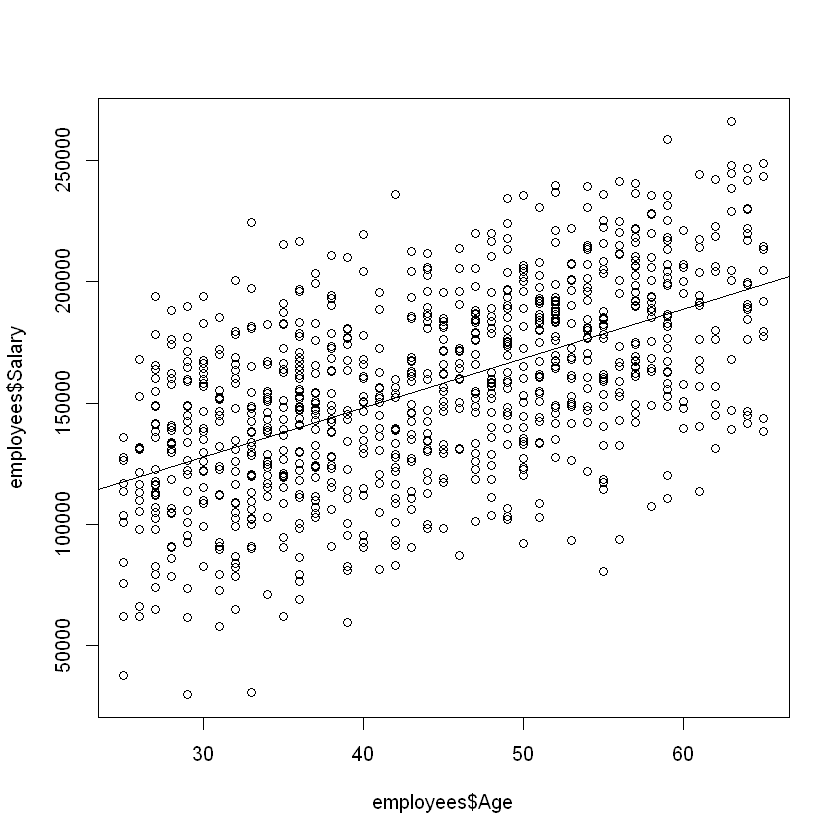

In [3]:
plot(employees$Age, employees$Salary)
abline(modelAge)

We say "predicted salary" because there clearly isn't an exact relationship between `Salary` and `Age`; the regression equation just gives us a model to relate the two variables.

How do we interpret the linear relationship determined by the least squares method? The slope $b_1$ is interpreted as the average change in $y$ for a one unit change in $x$. Within our sample, this means that for every one-year increase in `Age`, on average, `Salary` increases by \$2,027. We also use this relationship for forecasting: we predict that, for our population, for every year increase in `Age`, on average, `Salary` will go up by \$2,027.

The intercept $b_0$ represents the average value of $y$ when $x=0$. Often it is the case that we have no $x$ values near zero, or it is not possible for $x$ to equal zero, so the intercept is not interpretable. It is in the model to help position (or “anchor”) the line. In our example, the intercept tells us that the average `Salary` for someone 0 years old is \$67,134, which doesn't make a lot of sense.